
Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задача 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задача 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задача 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
names = (['surgery', 'Age','Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 
          'temperature of extremities','peripheral pulse', 'ucous membranes', 'capillary refill time',
          'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux',
          'nasogastric reflux PH', 'rectal examination', 'abdomen', 'packed cell volume',
          'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 
          'surgical lesion', 'type of lesion', 'type of lesion_2', 'type of lesion_3', 'cp_data'])

In [3]:
df = pd.read_csv('horse_data.csv', names=names, na_values='?')
df.head()

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,ucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion,type of lesion_2,type of lesion_3,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


Исходя из описания датасета возраст лошади это категориальная переменная, которая может принимать значение **1** или **2**. В исходном датасете стоит признак **9**, исправим это.

In [4]:
df['Age'] = df['Age'].replace(9,2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surgery                      299 non-null    float64
 1   Age                          300 non-null    int64  
 2   Hospital Number              300 non-null    int64  
 3   rectal temperature           240 non-null    float64
 4   pulse                        276 non-null    float64
 5   respiratory rate             242 non-null    float64
 6   temperature of extremities   244 non-null    float64
 7   peripheral pulse             231 non-null    float64
 8   ucous membranes              253 non-null    float64
 9   capillary refill time        268 non-null    float64
 10  pain                         245 non-null    float64
 11  peristalsis                  256 non-null    float64
 12  abdominal distension         244 non-null    float64
 13  nasogastric tube    

Исходя из описания датасета **25**, **26** и **27** аттрибут хранятся в колонке **type of lesion**, **type of lesion _2** и **type of lesion_3** в виде последовательности чисел образуя одно число. В целом не очень понятно откуда взялась колонка **26** и **27**, так как все эти данные должны находится в одной колонке.

In [6]:
print(f'В столбце type of lesion {(len(df[df["type of lesion"] == 0]) / len(df)):.2%} нулевых значений')
print(f'В столбце type of lesion_2 {(len(df[df["type of lesion_2"] == 0]) / len(df)):.2%} нулевых значений')
print(f'В столбце type of lesion_3 {(len(df[df["type of lesion_3"] == 0]) / len(df)):.2%} нулевых значений')

В столбце type of lesion 18.67% нулевых значений
В столбце type of lesion_2 97.67% нулевых значений
В столбце type of lesion_3 99.67% нулевых значений


 #### Учитывая, что в колонке 26 и 27 отсутствует от 97 до 99 % информации данные колонки удалим и будем работать с колонкой 25.

In [7]:
del df["type of lesion_2"]
del df["type of lesion_3"]

In [8]:
df_new = df[['surgery', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 
          'temperature of extremities', 'total protein', 'type of lesion']]

In [9]:
df_new.head()

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,total protein,type of lesion
0,2.0,1,38.5,66.0,28.0,3.0,8.4,11300
1,1.0,1,39.2,88.0,20.0,NaN,85.0,2208
2,2.0,1,38.3,40.0,24.0,1.0,6.7,0
3,1.0,2,39.1,164.0,84.0,4.0,7.2,2208
4,2.0,1,37.3,104.0,35.0,NaN,7.4,4300


## 1. Проведем расчет базовых метрик, кратко опишем результаты.

In [10]:
df_new.describe()

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,total protein,type of lesion
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,267.000000,300.000000
mean,1.397993,1.080000,38.167917,71.913043,30.417355,2.348361,24.456929,3657.880000
std,0.490305,0.271746,0.732289,28.630557,17.642231,1.045054,27.475009,5399.513513
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,3.300000,0.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,6.500000,2111.750000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,7.500000,2673.500000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,57.000000,3209.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,89.000000,41110.000000


In [12]:
df_new.isna().sum()

surgery                        1
Age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
total protein                 33
type of lesion                 0
dtype: int64

1. 6 атрибутов из 8 имеют пропуски в данных.
2. Атрибуты **pulse**, **respiratory rate** и **total protein** имеют большой размах данных. Очевидно есть аномальные значения, осталось понять  причину возникновения.
3. По остальным атрибутам на данном этапе замечани нет.

## 2.Найдем выбросы в данных, выдвинем гипотезы об их причинах и проинтерпретируем результаты. Примем и обоснуем решение о дальнейшей работе с ними.

На основании ранее проведенного описательного анализа проверим выбросы по атрибутам **pulse**, **respiratory rate** и **total protein**. Построим графики **boxplot**. Посчитаем межквартильный размах и посмотрм на данные.

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   total protein               267 non-null    float64
 7   type of lesion              300 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 18.9 KB


## **pulse**

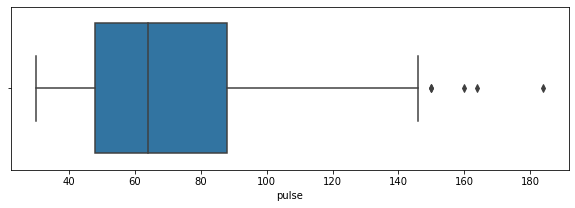

In [14]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x='pulse', data=df_new)

In [15]:
q1 = df_new['pulse'].quantile(0.25)
q3 = df_new['pulse'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df_new[df_new['pulse'].between(lower_bound, upper_bound, inclusive=True)]
len(remove_outliers)

271

In [16]:
pulse = pd.concat([df_new, remove_outliers]).drop_duplicates(keep=False)
pulse.dropna(subset=['pulse'], inplace=True)
pulse

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,total protein,type of lesion
3,1.0,2,39.1,164.0,84.0,4.0,7.2,2208
41,2.0,2,39.0,150.0,72.0,NaN,8.5,9400
55,1.0,2,38.6,160.0,20.0,3.0,NaN,7111
255,1.0,2,38.8,184.0,84.0,1.0,3.3,7111
275,1.0,2,38.8,150.0,50.0,1.0,6.2,4207


Частота сердечных сокращений может увеличиваться, когда лошадь возбуждена, перегрета или страдает сильным обезвоживанием, лихорадкой, инфекцией или сепсисом , сильной кровопотерей, тяжелым заболеванием сердца или легких или **шоком**. В этих случаях частота пульса в состоянии покоя у животного может быть выше 80. В наших данных есть атрибут **temperature of extremities**, который указывает что у лошади возможен шок. Таким образом, значения с высоким пульсом и значениями показателя **temperature of extremities** от 3 до 4 необходимо оставить в датасете. Значения, при которых **temperature of extremities** от 1 до 2, при наличии нормальной температуры **(до 39)**, а также нормальном уровне протеинов **total protein** необходимо убрать из датасета, так как нет оснований пологать, что у лошади шок, инфекция или обезвоживание, которые могут влиять на повышение пульса животого. 

## **respiratory rate**

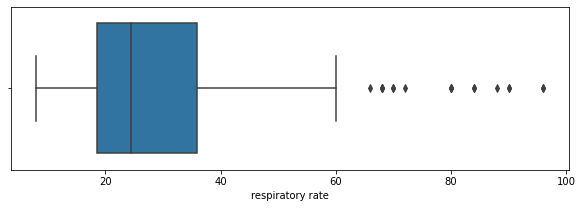

In [17]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x='respiratory rate', data=df_new)

In [18]:
q1 = df_new['respiratory rate'].quantile(0.25)
q3 = df_new['respiratory rate'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df_new[df_new['respiratory rate'].between(lower_bound, upper_bound, inclusive=True)]
len(remove_outliers)

225

In [19]:
respiratory_rate = pd.concat([df_new, remove_outliers]).drop_duplicates(keep=False)
respiratory_rate.dropna(subset=['respiratory rate'], inplace=True)
respiratory_rate

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,total protein,type of lesion
3,1.0,2,39.1,164.0,84.0,4.0,7.2,2208
39,1.0,2,39.2,146.0,96.0,NaN,NaN,2113
41,2.0,2,39.0,150.0,72.0,NaN,8.5,9400
82,1.0,2,38.1,100.0,80.0,3.0,5.7,3111
84,1.0,1,37.8,60.0,80.0,1.0,4.5,5206
103,1.0,2,38.0,140.0,68.0,1.0,5.3,7111
106,1.0,1,38.3,52.0,96.0,NaN,6.1,3209
120,1.0,1,39.4,54.0,66.0,1.0,6.0,2206
125,1.0,1,38.0,42.0,68.0,4.0,7.6,2205
186,1.0,1,39.3,64.0,90.0,2.0,6.7,21110


Высокие показатели **respiratory rate** обусловлены высоким пульсом у лошади или высокой температурой. Данные с высоким пульсом и частотой дыхания необходимо оставить, так же как и даные с высокой температурой и высокой частотой дыхания, а данные с нормальным пульсом и высокой чстотой дыхания, а также нормальной температурой необходимо удалить, так как нет оснований предположить, что частота дыхания повысилась от высокого пульса (это либо заболевание либо физ нагрузка) или от перегрева, о чем должна свидетельствовать высокая температура.

## **total protein**

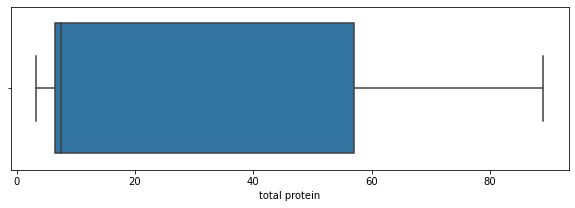

In [20]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x='total protein', data=df)

In [21]:
q1 = df_new['total protein'].quantile(0.25)
q3 = df_new['total protein'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df_new[df_new['total protein'].between(lower_bound, upper_bound, inclusive=True)]
len(remove_outliers)

267

In [22]:
total_protein = pd.concat([df_new, remove_outliers]).drop_duplicates(keep=False)
total_protein.dropna(subset=['total protein'], inplace=True)
total_protein

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,total protein,type of lesion


Не смотря на размах в данных, аномальных значений в данных на основании построенного графика а также межквартильном размахе нет. В аномальные значения попали пропуски в данных.

In [23]:
print(pd.concat([df_new, remove_outliers]).drop_duplicates(keep=False)['total protein'].tolist())

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


## 3. Рассчитаем количество пропусков в датасете. Примем и обоснуем решение о методе работы с пропусками по каждому столбцу, сформируем датафрейм, в котором пропуски будут отсутствовать.

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   total protein               267 non-null    float64
 7   type of lesion              300 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 18.9 KB


In [25]:
for col in df_new.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.2%}')

surgery - 0.33%
Age - 0.00%
rectal temperature - 20.00%
pulse - 8.00%
respiratory rate - 19.33%
temperature of extremities - 18.67%
total protein - 11.00%
type of lesion - 0.00%


## Атрибут **surgery**. 

Так как количество пропусков не значительно можем смело их удалить.

In [26]:
print(df_new.surgery.mean())
print(df_new.surgery.median())
print(df_new.surgery.mode()[0])

print(df_new.surgery.std())
print(df_new.surgery.var())

1.3979933110367893
1.0
1.0
0.49030464432881815
0.24039864425040888


In [27]:
df_new.dropna(subset=['surgery'], inplace=True)

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   Age                         299 non-null    int64  
 2   rectal temperature          239 non-null    float64
 3   pulse                       275 non-null    float64
 4   respiratory rate            241 non-null    float64
 5   temperature of extremities  243 non-null    float64
 6   total protein               266 non-null    float64
 7   type of lesion              299 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 21.0 KB


In [29]:
print(df_new.surgery.mean())
print(df_new.surgery.median())
print(df_new.surgery.mode()[0])

print(df_new.surgery.std())
print(df_new.surgery.var())

1.3979933110367893
1.0
1.0
0.49030464432881815
0.24039864425040888


Удалилась всего одна строчка, на наших статистиках это никак не отразилось.

## Атрибут rectal temperature. 

In [30]:
for col in df_new.columns:
    pct_missing = df_new[col].isnull().mean()
    print(f'{col} - {pct_missing :.2%}')

surgery - 0.00%
Age - 0.00%
rectal temperature - 20.07%
pulse - 8.03%
respiratory rate - 19.40%
temperature of extremities - 18.73%
total protein - 11.04%
type of lesion - 0.00%


In [31]:
df_new.describe()

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,total protein,type of lesion
count,299.000000,299.000000,239.000000,275.000000,241.000000,243.000000,266.000000,299.000000
mean,1.397993,1.080268,38.168619,72.000000,30.460581,2.345679,24.274436,3659.709030
std,0.490305,0.272162,0.733744,28.646219,17.666102,1.046369,27.364194,5408.472421
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,3.300000,0.000000
25%,1.000000,1.000000,37.800000,48.000000,18.000000,1.000000,6.500000,2111.500000
50%,1.000000,1.000000,38.200000,64.000000,25.000000,3.000000,7.500000,2322.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,56.750000,3209.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,89.000000,41110.000000


В данном случае, так как в наших данных не большой разброс и нет выбросов заменим пропуски средним значениме.

In [32]:
print(df_new['rectal temperature'].mean())
print(df_new['rectal temperature'].median())
print(df_new['rectal temperature'].mode()[0])

print(df_new['rectal temperature'].std())
print(df_new['rectal temperature'].var())

38.16861924686195
38.2
38.0
0.7337444096002365
0.5383808586195995


In [33]:
df_new['rectal temperature'].fillna(df_new['rectal temperature'].mean(), inplace=True)

In [34]:
print(df_new['rectal temperature'].mean())
print(df_new['rectal temperature'].median())
print(df_new['rectal temperature'].mode()[0])

print(df_new['rectal temperature'].std())
print(df_new['rectal temperature'].var())

38.168619246861994
38.16861924686195
38.16861924686195
0.6557301487845806
0.42998202802504815


Наши статистики сильно не поменялись.

In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   Age                         299 non-null    int64  
 2   rectal temperature          299 non-null    float64
 3   pulse                       275 non-null    float64
 4   respiratory rate            241 non-null    float64
 5   temperature of extremities  243 non-null    float64
 6   total protein               266 non-null    float64
 7   type of lesion              299 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 21.0 KB


## Атрибут pulse и respiratory rate.

In [36]:
for col in df_new.columns:
    pct_missing = df_new[col].isnull().mean()
    print(f'{col} - {pct_missing :.2%}')

surgery - 0.00%
Age - 0.00%
rectal temperature - 0.00%
pulse - 8.03%
respiratory rate - 19.40%
temperature of extremities - 18.73%
total protein - 11.04%
type of lesion - 0.00%


Учитывая, что в данных атрибутах имеются выбросы заменим пропуски медианой. (В случает удаления выбросов на втором этапе данные можно заменить средним значением)

In [37]:
print(df_new['pulse'].mean())
print(df_new['pulse'].median())
print(df_new['pulse'].mode()[0])

print(df_new['pulse'].std())
print(df_new['pulse'].var())

72.0
64.0
48.0
28.646218588429058
820.6058394160584


In [38]:
print(df_new['respiratory rate'].mean())
print(df_new['respiratory rate'].median())
print(df_new['respiratory rate'].mode()[0])

print(df_new['respiratory rate'].std())
print(df_new['respiratory rate'].var())

30.46058091286307
25.0
20.0
17.66610166376463
312.0911479944674


In [39]:
df_new['pulse'].fillna(df_new['pulse'].median(), inplace=True)
df_new['respiratory rate'].fillna(df_new['respiratory rate'].median(), inplace=True)

In [40]:
print(df_new['pulse'].mean())
print(df_new['pulse'].median())
print(df_new['pulse'].mode()[0])

print(df_new['pulse'].std())
print(df_new['pulse'].var())

71.35785953177258
64.0
64.0
27.554625979183324
759.2574128526846


In [41]:
print(df_new['respiratory rate'].mean())
print(df_new['respiratory rate'].median())
print(df_new['respiratory rate'].mode()[0])

print(df_new['respiratory rate'].std())
print(df_new['respiratory rate'].var())

29.401337792642142
25.0
25.0
16.000822070416792
256.0263069291371


В целом наши статистики по данным атрибутам не сильно отклонились. Данная замена допустима.

## Атрибут temperature of extremities.

In [42]:
for col in df_new.columns:
    pct_missing = df_new[col].isnull().mean()
    print(f'{col} - {pct_missing :.2%}')

surgery - 0.00%
Age - 0.00%
rectal temperature - 0.00%
pulse - 0.00%
respiratory rate - 0.00%
temperature of extremities - 18.73%
total protein - 11.04%
type of lesion - 0.00%


In [43]:
df_new['temperature of extremities'].value_counts()

3.0    108
1.0     78
2.0     30
4.0     27
Name: temperature of extremities, dtype: int64

In [44]:
df_new.corr()

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,total protein,type of lesion
surgery,1.000000,-0.089319,0.036601,-0.176001,-0.176980,-0.116474,-0.044828,-0.163940
Age,-0.089319,1.000000,0.179149,0.505374,0.374781,-0.056107,-0.118103,0.022870
rectal temperature,0.036601,0.179149,1.000000,0.195025,0.231149,0.085543,-0.055535,0.053031
pulse,-0.176001,0.505374,0.195025,1.000000,0.433346,0.320169,-0.077896,0.072074
respiratory rate,-0.176980,0.374781,0.231149,0.433346,1.000000,0.098520,-0.085356,0.143630
temperature of extremities,-0.116474,-0.056107,0.085543,0.320169,0.098520,1.000000,0.006567,-0.020149
total protein,-0.044828,-0.118103,-0.055535,-0.077896,-0.085356,0.006567,1.000000,-0.181468
type of lesion,-0.163940,0.022870,0.053031,0.072074,0.143630,-0.020149,-0.181468,1.000000


Учитывая отсутствие линейной зависимости **temperature of extremities** с другими атрибутами заменим пропуски модой.

In [45]:
df_new['temperature of extremities'].fillna(df_new['temperature of extremities'].mode()[0], inplace=True)

df_new['temperature of extremities'].value_counts()

3.0    164
1.0     78
2.0     30
4.0     27
Name: temperature of extremities, dtype: int64

## Атрибут total protein.

In [46]:
for col in df_new.columns:
    pct_missing = df_new[col].isnull().mean()
    print(f'{col} - {pct_missing :.2%}')

surgery - 0.00%
Age - 0.00%
rectal temperature - 0.00%
pulse - 0.00%
respiratory rate - 0.00%
temperature of extremities - 0.00%
total protein - 11.04%
type of lesion - 0.00%


In [47]:
print(df_new['total protein'].mean())
print(df_new['total protein'].median())
print(df_new['total protein'].mode()[0])

print(df_new['total protein'].std())
print(df_new['total protein'].var())

24.27443609022557
7.5
6.5
27.364194079222113
748.7991176053345


In [48]:
df_new['total protein'].fillna(df_new['total protein'].mean(), inplace=True)

In [49]:
print(df_new['total protein'].mean())
print(df_new['total protein'].median())
print(df_new['total protein'].mode()[0])

print(df_new['total protein'].std())
print(df_new['total protein'].var())

24.274436090225556
7.7
24.27443609022557
25.804619934249228
665.8784099510526


Сильно увеличилась мода, но мат ожидание и медиана сильно не отклонились.

Получили датафрейм без пропусков.

In [50]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   Age                         299 non-null    int64  
 2   rectal temperature          299 non-null    float64
 3   pulse                       299 non-null    float64
 4   respiratory rate            299 non-null    float64
 5   temperature of extremities  299 non-null    float64
 6   total protein               299 non-null    float64
 7   type of lesion              299 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 21.0 KB


In [51]:
 df.describe()

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,ucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion,cp_data
count,299.000000,300.000000,3.000000e+02,240.000000,276.000000,242.000000,244.000000,231.000000,253.000000,268.000000,245.00000,256.000000,244.000000,196.000000,194.000000,53.000000,198.000000,182.000000,271.000000,267.000000,135.000000,102.000000,299.000000,300.000000,300.000000,300.000000
mean,1.397993,1.080000,1.085889e+06,38.167917,71.913043,30.417355,2.348361,2.017316,2.853755,1.305970,2.95102,2.917969,2.266393,1.755102,1.582474,4.707547,2.757576,3.692308,46.295203,24.456929,2.037037,3.019608,1.551839,1.363333,3657.880000,1.670000
std,0.490305,0.271746,1.529801e+06,0.732289,28.630557,17.642231,1.045054,1.042428,1.620294,0.477629,1.30794,0.976744,1.065131,0.649437,0.805359,1.982311,1.251119,1.491725,10.419335,27.475009,0.804905,1.968567,0.737187,0.481763,5399.513513,0.470998
min,1.000000,1.000000,5.184760e+05,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,3.300000,1.000000,0.100000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,5.289040e+05,37.800000,48.000000,18.500000,1.000000,1.000000,1.000000,1.000000,2.00000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,38.000000,6.500000,1.000000,2.000000,1.000000,1.000000,2111.750000,1.000000
50%,1.000000,1.000000,5.303055e+05,38.200000,64.000000,24.500000,3.000000,2.000000,3.000000,1.000000,3.00000,3.000000,2.000000,2.000000,1.000000,5.000000,3.000000,4.000000,45.000000,7.500000,2.000000,2.250000,1.000000,1.000000,2673.500000,2.000000
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,36.000000,3.000000,3.000000,4.000000,2.000000,4.00000,4.000000,3.000000,2.000000,2.000000,6.500000,4.000000,5.000000,52.000000,57.000000,3.000000,3.900000,2.000000,2.000000,3209.000000,2.000000
max,2.000000,2.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,5.00000,4.000000,4.000000,3.000000,3.000000,7.500000,4.000000,5.000000,75.000000,89.000000,3.000000,10.100000,3.000000,2.000000,41110.000000,2.000000


In [52]:
df_new.describe()

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,total protein,type of lesion
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,1.397993,1.080268,38.168619,71.357860,29.401338,2.468227,24.274436,3659.709030
std,0.490305,0.272162,0.655730,27.554626,16.000822,0.976997,25.804620,5408.472421
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,3.300000,0.000000
25%,1.000000,1.000000,37.900000,48.500000,20.000000,1.000000,6.600000,2111.500000
50%,1.000000,1.000000,38.168619,64.000000,25.000000,3.000000,7.700000,2322.000000
75%,2.000000,1.000000,38.500000,88.000000,34.500000,3.000000,52.000000,3209.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,89.000000,41110.000000
